<a href="https://colab.research.google.com/github/SourabhNishal/Deep-Learning/blob/main/Foodclass_inceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/food15.zip" "/content"

In [ ]:
!unzip /content/food15.zip -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/food15/food-101/images/breakfast_burrito/380053.jpg  
  inflating: /content/food15/food-101/images/breakfast_burrito/3801366.jpg  
  inflating: /content/food15/food-101/images/breakfast_burrito/3802479.jpg  
  inflating: /content/food15/food-101/images/breakfast_burrito/3812727.jpg  
  inflating: /content/food15/food-101/images/breakfast_burrito/3819004.jpg  
  inflating: /content/food15/food-101/images/breakfast_burrito/3821882.jpg  
  inflating: /content/food15/food-101/images/breakfast_burrito/3828209.jpg  
  inflating: /content/food15/food-101/images/breakfast_burrito/3835487.jpg  
  inflating: /content/food15/food-101/images/breakfast_burrito/3838356.jpg  
  inflating: /content/food15/food-101/images/breakfast_burrito/383923.jpg  
  inflating: /content/food15/food-101/images/breakfast_burrito/384206.jpg  
  inflating: /content/food15/food-101/images/breakfast_burrito/384606.jpg  
  inflating: /content/food15/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model,Model

In [ ]:
data_dir = '/content/food15/food-101/images'
data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 14250 files belonging to 15 classes.


In [ ]:
#Create an ImageDataGenerator and do Image Augmentation
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2)

In [ ]:
height = 228
width = 228
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [ ]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 11400 images belonging to 15 classes.
Found 2850 images belonging to 15 classes.


In [ ]:
num_classes = len(data.class_names)
print('.... Number of Classes : {0} ....'.format(num_classes))

.... Number of Classes : 15 ....


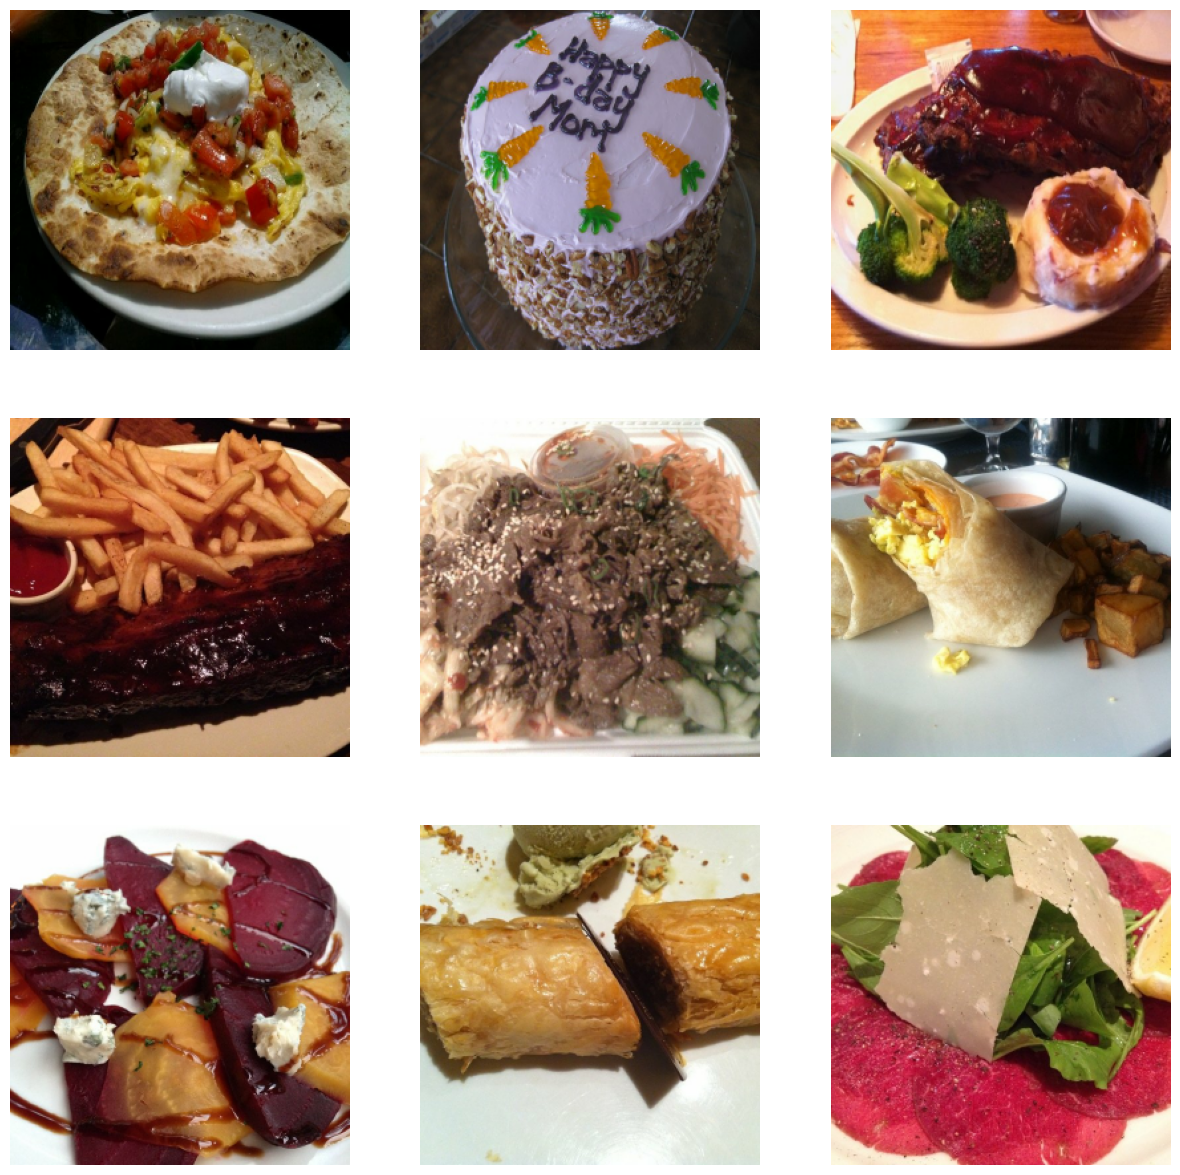

In [ ]:
#Defing a function to see images
def show_img(data):
    plt.figure(figsize=(15,15))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")

#Plotting the images in dataset
show_img(data)

Training the model with pre trained model

In [ ]:
# load pre-trained InceptionV3
pre_trained = InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape, pooling='avg')

for layer in pre_trained.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
x = pre_trained.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs = pre_trained.input, outputs = predictions)
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 228, 228, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 113, 113, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 113, 113, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 113, 113, 32)         0         ['batch_normalization[0][0

In [ ]:
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = val_data.n // val_data.batch_size

history = model.fit_generator(train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = val_data,
                    validation_steps = STEP_SIZE_VALID,
                    epochs = 15,
                    verbose = 1)

<ipython-input-16-d4d9bca4c38f>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data,


Epoch 1/15
356/356 [==============================] - 218s 613ms/step - loss: 1.9791 - accuracy: 0.5315 - val_loss: 1.5072 - val_accuracy: 0.5857
Epoch 2/15
356/356 [==============================] - 213s 598ms/step - loss: 1.4163 - accuracy: 0.5951 - val_loss: 1.3397 - val_accuracy: 0.5983
Epoch 3/15
356/356 [==============================] - 214s 602ms/step - loss: 1.1734 - accuracy: 0.6327 - val_loss: 1.2161 - val_accuracy: 0.6303
Epoch 4/15
356/356 [==============================] - 212s 595ms/step - loss: 1.1133 - accuracy: 0.6473 - val_loss: 1.1712 - val_accuracy: 0.6408
Epoch 5/15
356/356 [==============================] - 216s 606ms/step - loss: 1.0519 - accuracy: 0.6610 - val_loss: 1.2035 - val_accuracy: 0.6355
Epoch 6/15
356/356 [==============================] - 215s 603ms/step - loss: 1.0269 - accuracy: 0.6691 - val_loss: 1.1602 - val_accuracy: 0.6447
Epoch 7/15
356/356 [==============================] - 212s 595ms/step - loss: 1.0104 - accuracy: 0.6766 - val_loss: 1.1808 -

In [ ]:
model.save("food_inc.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


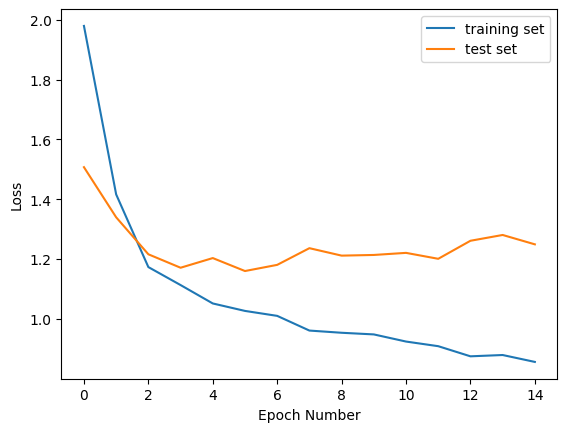

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='test set')
plt.legend()

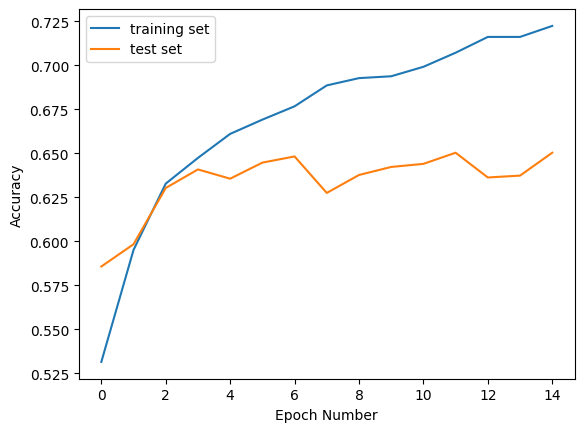

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [ ]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

1/1 [==============================] - 0s 41ms/step


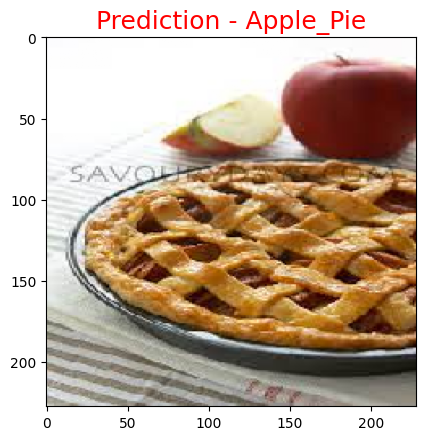

In [ ]:
predict_image('/content/images.jpg', model)